In [1]:
# reference: https://github.com/PTRRupprecht/GenHurst

 
import numpy as np
import warnings
 
def genhurst(S,q):

    L=len(S)       
    if L < 100:
        warnings.warn('Data series very short!')
       
    H = np.zeros((len(range(5,20)),1))
    k = 0
    
    for Tmax in range(5,20):
        
        x = np.arange(1,Tmax+1,1)
        mcord = np.zeros((Tmax,1))
        
        for tt in range(1,Tmax+1):
            dV = S[np.arange(tt,L,tt)] - S[np.arange(tt,L,tt)-tt] 
            VV = S[np.arange(tt,L+tt,tt)-tt]
            N = len(dV) + 1
            X = np.arange(1,N+1,dtype=np.float64)
            Y = VV
            mx = np.sum(X)/N
            SSxx = np.sum(X**2) - N*mx**2
            my = np.sum(Y)/N
            SSxy = np.sum( np.multiply(X,Y))  - N*mx*my
            cc1 = SSxy/SSxx
            cc2 = my - cc1*mx
            ddVd = dV - cc1
            VVVd = VV - np.multiply(cc1,np.arange(1,N+1,dtype=np.float64)) - cc2
            mcord[tt-1] = np.mean( np.abs(ddVd)**q )/np.mean( np.abs(VVVd)**q )
            
        mx = np.mean(np.log10(x))
        SSxx = np.sum( np.log10(x)**2) - Tmax*mx**2
        my = np.mean(np.log10(mcord))
        SSxy = np.sum( np.multiply(np.log10(x),np.transpose(np.log10(mcord)))) - Tmax*mx*my
        H[k] = SSxy/SSxx
        k = k + 1
        
    mH = np.mean(H)/q
    
    return mH

In [2]:
import pandas as pd
btc = pd.read_csv("/Users/davidalexanderbehrens/Downloads/BTC-USD.csv")
eth = pd.read_csv("/Users/davidalexanderbehrens/Downloads/ETH-USD.csv")
xrp = pd.read_csv("/Users/davidalexanderbehrens/Downloads/XRP-USD.csv")

In [3]:
btc = np.array(btc.Close)
eth = np.array(eth.Close)
xrp = np.array(xrp.Close)

In [4]:
q = np.linspace(-4,4)

In [5]:
h_btc = []
h_eth = []
h_xrp = []
for moment in q:
    h_btc.append(genhurst(btc, moment))
    h_eth.append(genhurst(eth, moment))
    h_xrp.append(genhurst(xrp, moment))

In [6]:
from matplotlib import pyplot as plt

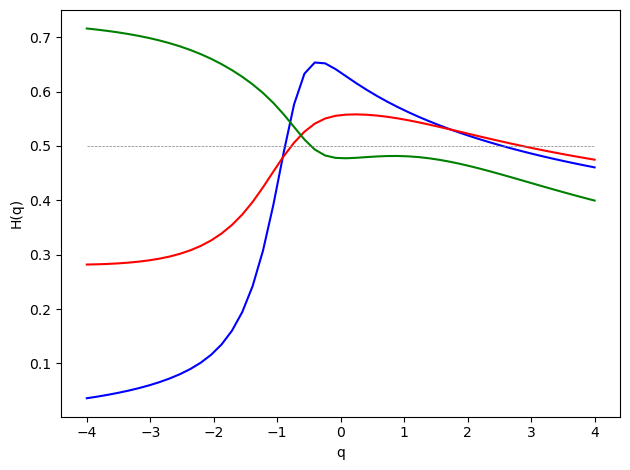

In [7]:
plt.plot(q,h_btc, label="BTC", color="blue")
plt.plot(q, h_eth, label="ETH", color="red")
plt.plot(q, h_xrp, label="XRP", color= "green")
plt.ylabel("H(q)")
plt.yticks=np.arange(0,1,0.1)
plt.xlabel("q")
plt.hlines(0.5, -4, 4, linewidth=0.5, color="grey", linestyle="dashed")
plt.tight_layout()
plt.savefig("GenHurstExp.png", transparent=True)
plt.show()